In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

In [3]:
import pandas as pd 
import yfinance as yf
import numpy as np

In [3]:
#Download HKEX stock prices and keep only the adjusted close price
df = yf.download("0388.HK", 
                 start="2018-01-01",
                 end="2023-05-30",
                 progress=False)
df = df[["Adj Close"]]

In [4]:
#Calculate the log returns and the 20-day SMA of the close prices
df["log_rtn"] = df["Adj Close"].apply(np.log).diff(1)
df["sma_20"] = df["Adj Close"].rolling(window=20).mean()
df

Adj Close   log_rtn      sma_20
Date                                        
2018-01-02  219.850998       NaN         NaN
2018-01-03  218.972275 -0.004005         NaN
2018-01-04  223.717285  0.021438         NaN
2018-01-05  222.487091 -0.005514         NaN
2018-01-08  230.219666  0.034165         NaN
...                ...       ...         ...
2023-05-22  307.600006  0.011773  316.849997
2023-05-23  306.200012 -0.004562  315.659998
2023-05-24  301.000000 -0.017128  314.459998
2023-05-25  294.000000 -0.023530  312.709998
2023-05-29  289.000000 -0.017153  310.839998

[1330 rows x 3 columns]

In [5]:
#Create a position indicator and change the false and true into 0 and 1
df["position"] = (df["Adj Close"] > df["sma_20"]).astype(int)
df

Adj Close   log_rtn      sma_20  position
Date                                                  
2018-01-02  219.850998       NaN         NaN         0
2018-01-03  218.972275 -0.004005         NaN         0
2018-01-04  223.717285  0.021438         NaN         0
2018-01-05  222.487091 -0.005514         NaN         0
2018-01-08  230.219666  0.034165         NaN         0
...                ...       ...         ...       ...
2023-05-22  307.600006  0.011773  316.849997         0
2023-05-23  306.200012 -0.004562  315.659998         0
2023-05-24  301.000000 -0.017128  314.459998         0
2023-05-25  294.000000 -0.023530  312.709998         0
2023-05-29  289.000000 -0.017153  310.839998         0

[1330 rows x 4 columns]

In [28]:
df["position"].shift(1)

Date
2018-01-02    NaN
2018-01-03    0.0
2018-01-04    0.0
2018-01-05    0.0
2018-01-08    0.0
             ... 
2023-04-24    1.0
2023-04-25    1.0
2023-04-26    0.0
2023-04-27    0.0
2023-04-28    1.0
Name: position, Length: 1340, dtype: float64

In [29]:
df["position"]

Date
2018-01-02    0
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
             ..
2023-04-24    1
2023-04-25    0
2023-04-26    0
2023-04-27    1
2023-04-28    1
Name: position, Length: 1340, dtype: int32

In [6]:
#Count how many times we entered a long position
#shift means that the series is moving to the next period by n units
sum((df["position"] == 1) & (df["position"].shift(1) == 0))

73

In [16]:
a = pd.DataFrame(np.arange(10))
a

0
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9

In [17]:
a.shift(1)
#shift means that the series is moving to the next period by n units

0
0  NaN
1  0.0
2  1.0
3  2.0
4  3.0
5  4.0
6  5.0
7  6.0
8  7.0
9  8.0

In [24]:
df.head()

Adj Close   log_rtn  sma_20  position
Date                                              
2018-01-02  219.850983       NaN     NaN         0
2018-01-03  218.972290 -0.004005     NaN         0
2018-01-04  223.717300  0.021438     NaN         0
2018-01-05  222.487091 -0.005514     NaN         0
2018-01-08  230.219666  0.034165     NaN         0

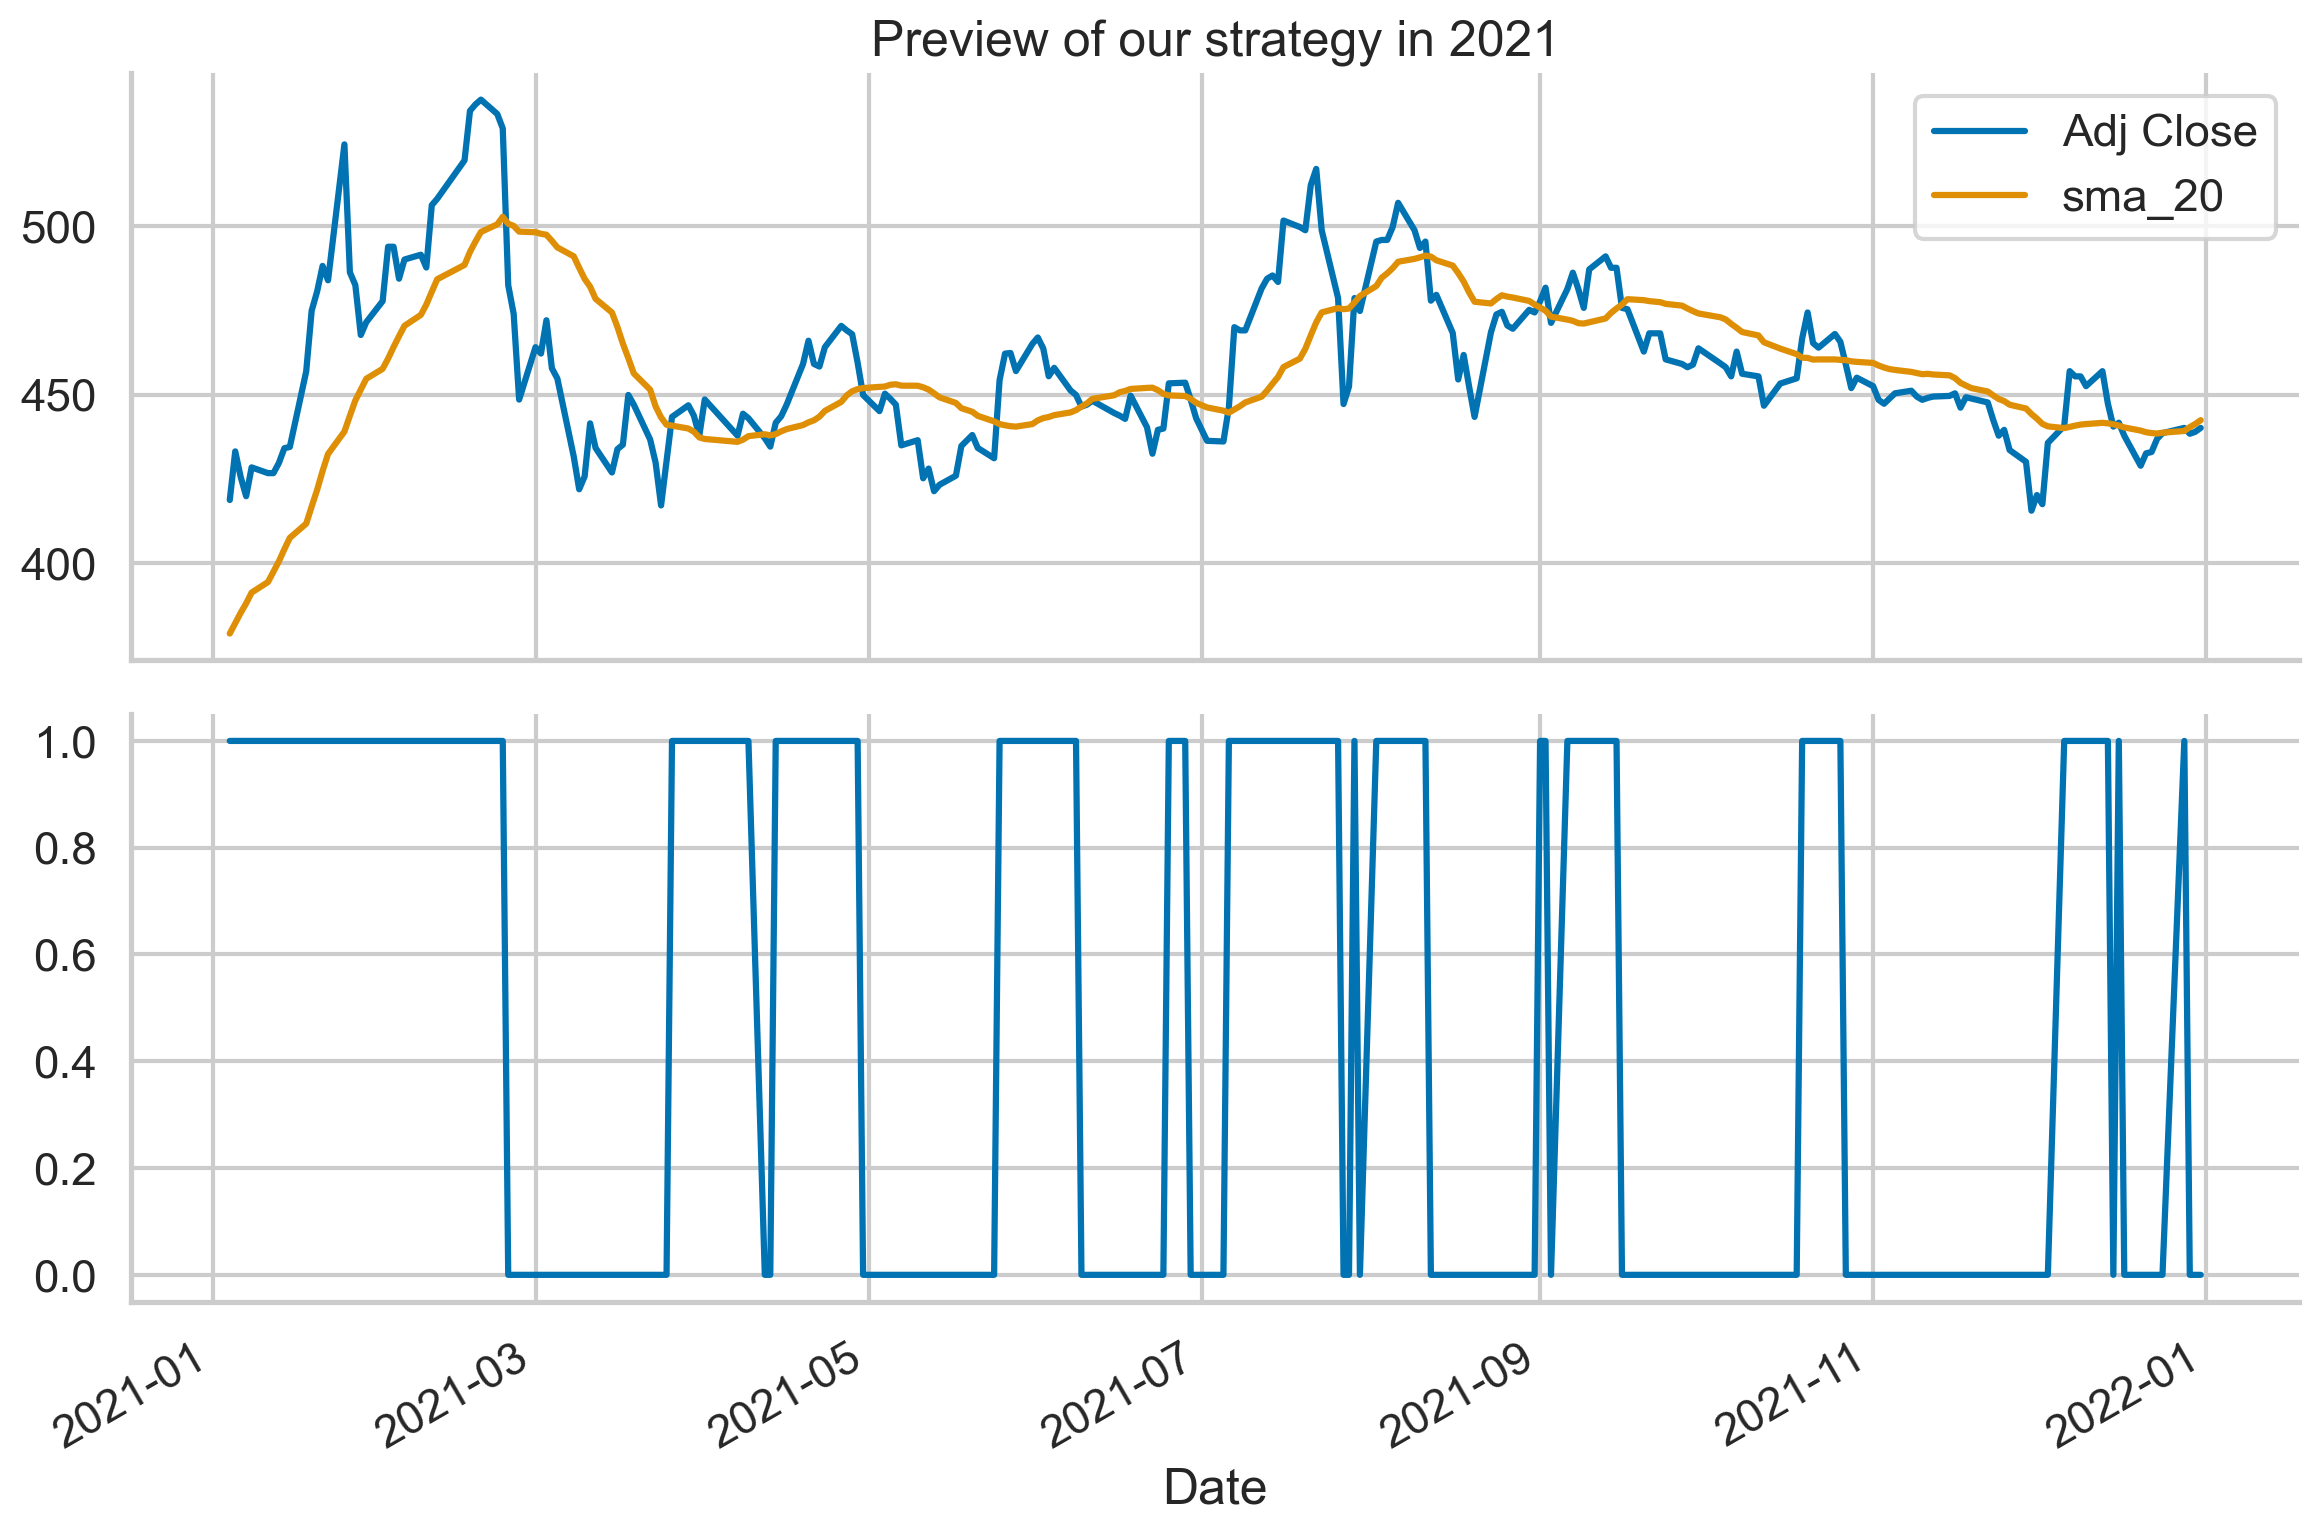

In [26]:
fig, ax = plt.subplots(2, sharex=True)
df.loc["2021", ["Adj Close", "sma_20"]].plot(ax=ax[0])
df.loc["2021", "position"].plot(ax=ax[1])
ax[0].set_title("Preview of our strategy in 2021")

sns.despine()
plt.tight_layout()

In [7]:
df["strategy_rtn"] = df["position"].shift(1) * df["log_rtn"]
df["strategy_rtn_cum"] = df["strategy_rtn"].cumsum().apply(np.exp)
df

Adj Close   log_rtn      sma_20  position  strategy_rtn  \
Date                                                                   
2018-01-02  219.850998       NaN         NaN         0           NaN   
2018-01-03  218.972275 -0.004005         NaN         0          -0.0   
2018-01-04  223.717285  0.021438         NaN         0           0.0   
2018-01-05  222.487091 -0.005514         NaN         0          -0.0   
2018-01-08  230.219666  0.034165         NaN         0           0.0   
...                ...       ...         ...       ...           ...   
2023-05-22  307.600006  0.011773  316.849997         0           0.0   
2023-05-23  306.200012 -0.004562  315.659998         0          -0.0   
2023-05-24  301.000000 -0.017128  314.459998         0          -0.0   
2023-05-25  294.000000 -0.023530  312.709998         0          -0.0   
2023-05-29  289.000000 -0.017153  310.839998         0          -0.0   

            strategy_rtn_cum  
Date                          
2018-01-02               NaN  
2018-01-03          1.000000  
2018-01-04          1.000000  
2018-01-05          1.000000  
2018-01-08          1.000000  
...                      ...  
2023-05-22          1.812205  
2023-05-23          1.812205  
2023-05-24          1.812205  
2023-05-25          1.812205  
2023-05-29          1.812205  

[1330 rows x 6 columns]

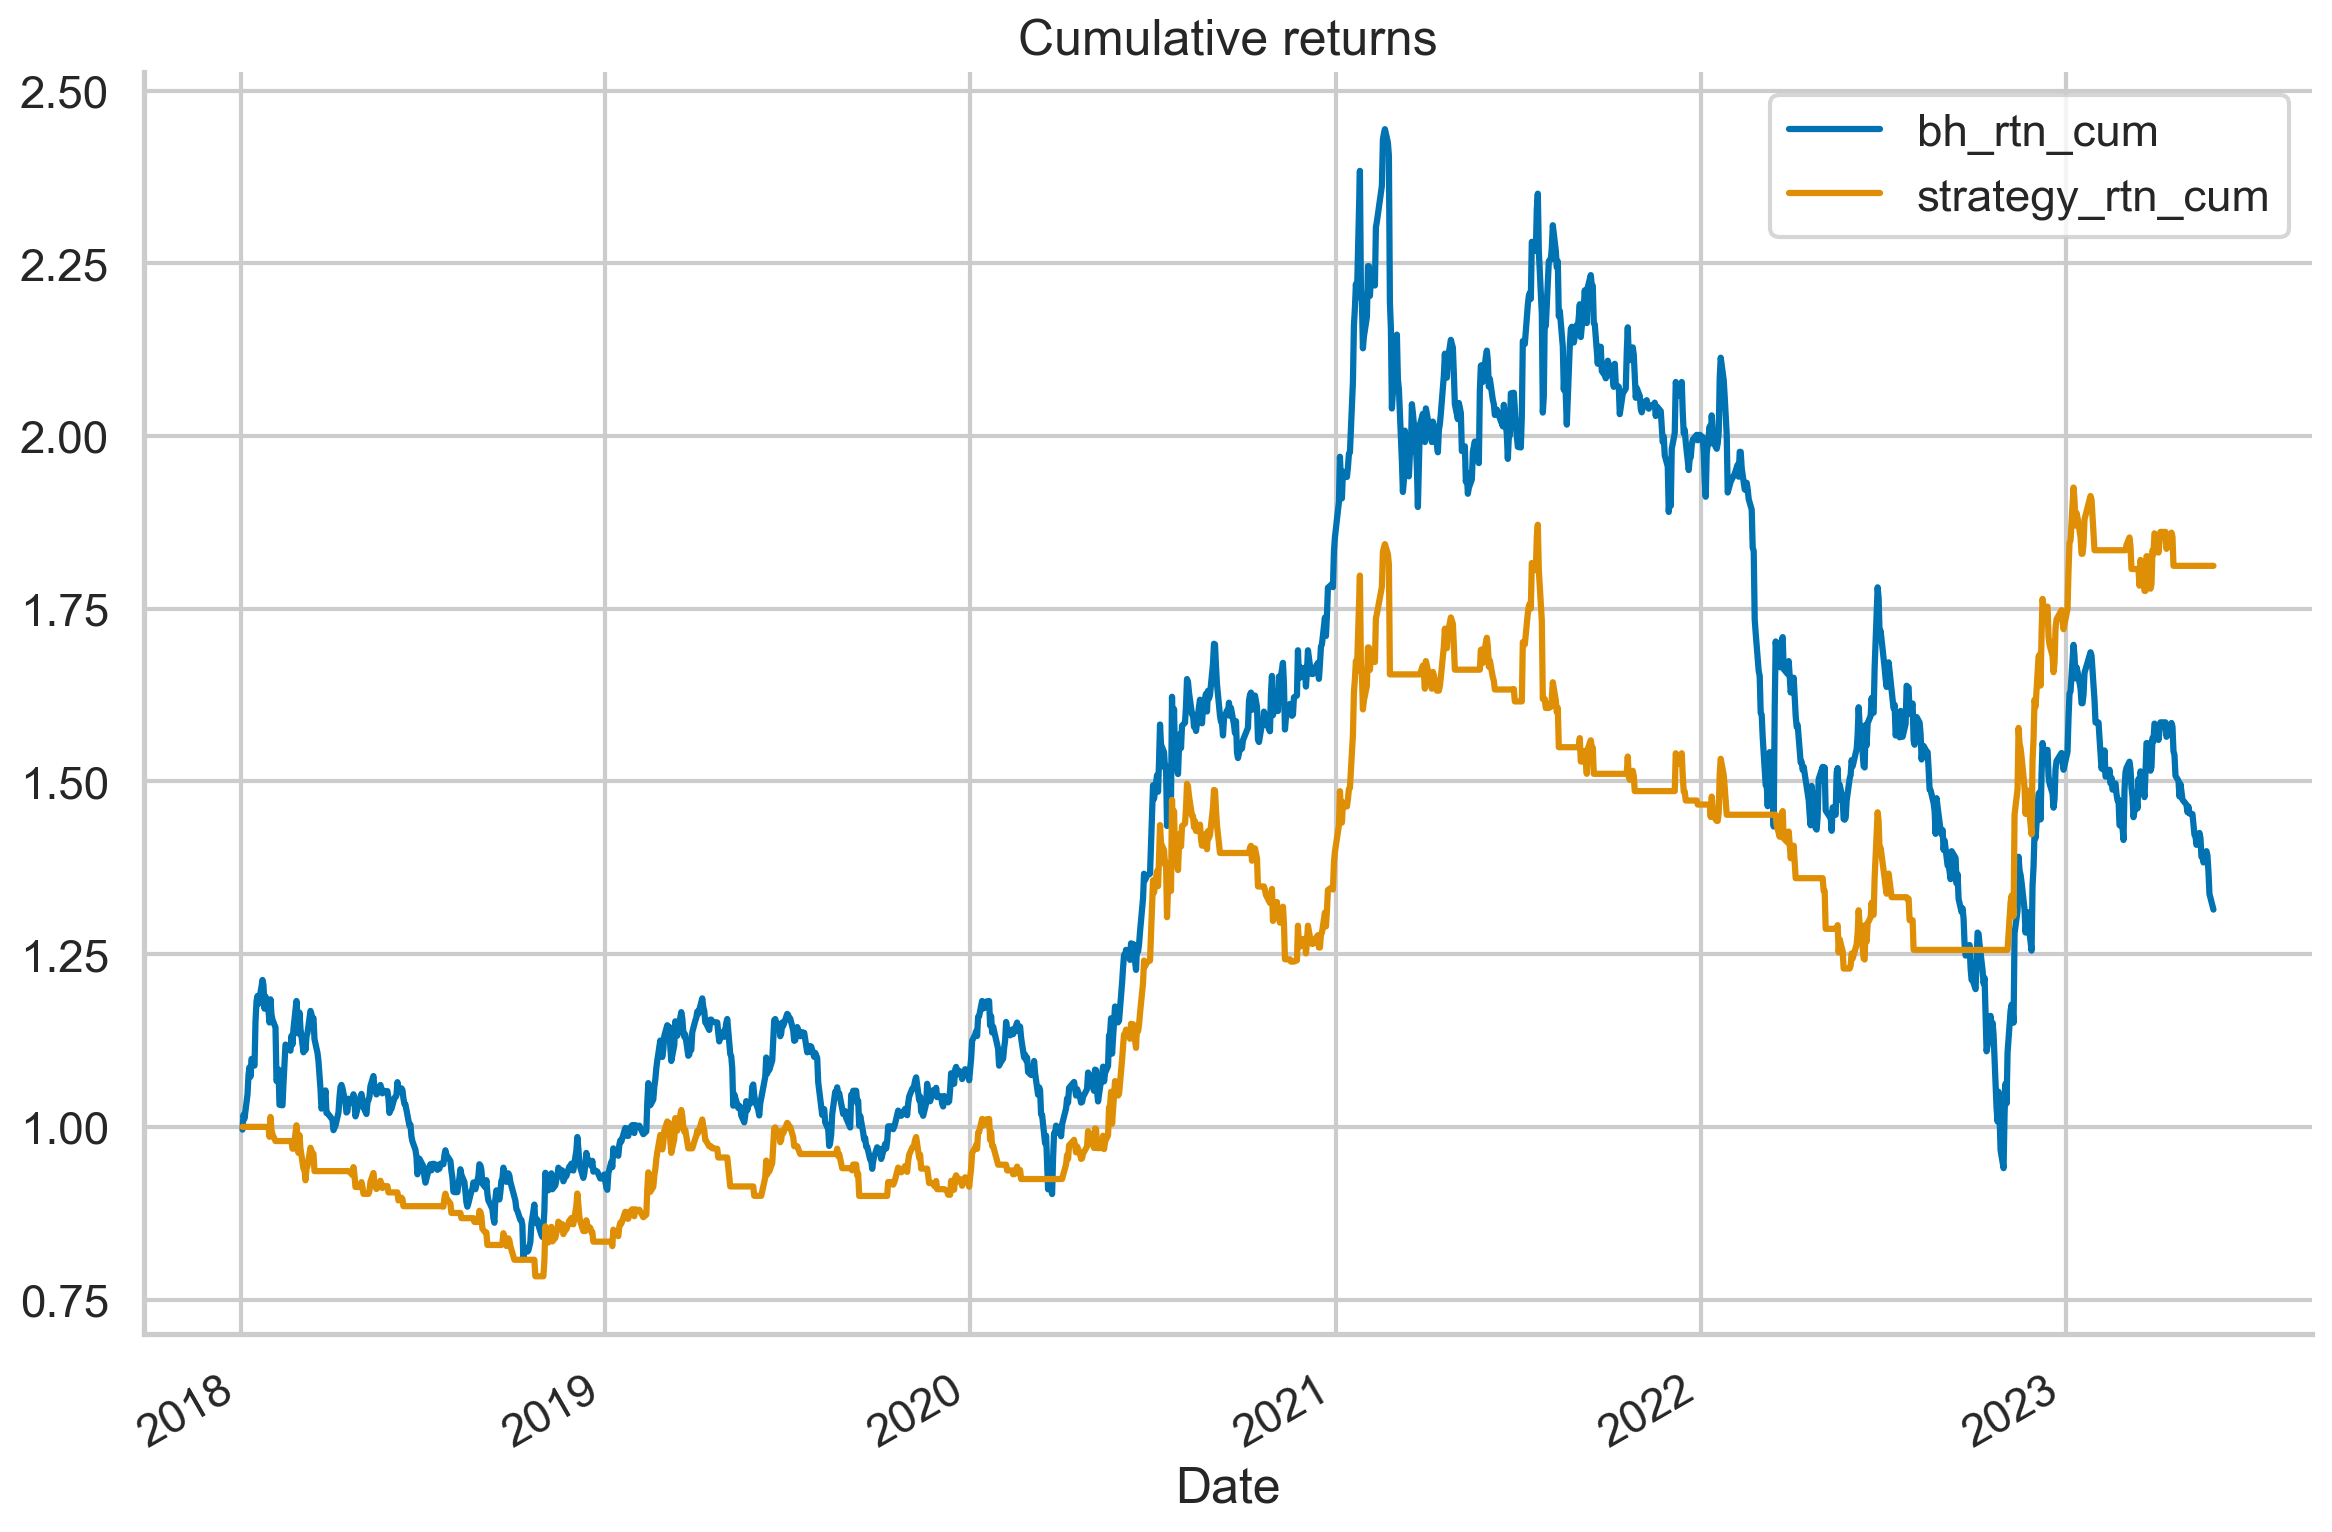

In [8]:
#Add the buy-and-hold strategy for comparison
df["bh_rtn_cum"] = df["log_rtn"].cumsum().apply(np.exp)

df[["bh_rtn_cum", "strategy_rtn_cum"]].plot(title="Cumulative returns")

sns.despine()
plt.tight_layout()

In [9]:
TRANSACTION_COST = 0.001 
df["tc"] = df["position"].diff(1).abs() * TRANSACTION_COST
df.tail()

Adj Close   log_rtn      sma_20  position  strategy_rtn  \
Date                                                                   
2023-05-22  307.600006  0.011773  316.849997         0           0.0   
2023-05-23  306.200012 -0.004562  315.659998         0          -0.0   
2023-05-24  301.000000 -0.017128  314.459998         0          -0.0   
2023-05-25  294.000000 -0.023530  312.709998         0          -0.0   
2023-05-29  289.000000 -0.017153  310.839998         0          -0.0   

            strategy_rtn_cum  bh_rtn_cum   tc  
Date                                           
2023-05-22          1.812205    1.399129  0.0  
2023-05-23          1.812205    1.392762  0.0  
2023-05-24          1.812205    1.369109  0.0  
2023-05-25          1.812205    1.337269  0.0  
2023-05-29          1.812205    1.314527  0.0

In [10]:
df["strategy_rtn_cum_tc"] = (
    (df["strategy_rtn"] - df["tc"]).cumsum().apply(np.exp)
)

In [11]:
df.head().round(2)

Adj Close  log_rtn  sma_20  position  strategy_rtn  \
Date                                                             
2018-01-02     219.85      NaN     NaN         0           NaN   
2018-01-03     218.97    -0.00     NaN         0          -0.0   
2018-01-04     223.72     0.02     NaN         0           0.0   
2018-01-05     222.49    -0.01     NaN         0          -0.0   
2018-01-08     230.22     0.03     NaN         0           0.0   

            strategy_rtn_cum  bh_rtn_cum   tc  strategy_rtn_cum_tc  
Date                                                                
2018-01-02               NaN         NaN  NaN                  NaN  
2018-01-03               1.0        1.00  0.0                  1.0  
2018-01-04               1.0        1.02  0.0                  1.0  
2018-01-05               1.0        1.01  0.0                  1.0  
2018-01-08               1.0        1.05  0.0                  1.0

In [38]:
# latex_table = df.head().round(2).to_latex(index=True, multicolumn_format='c')

# print(latex_table)

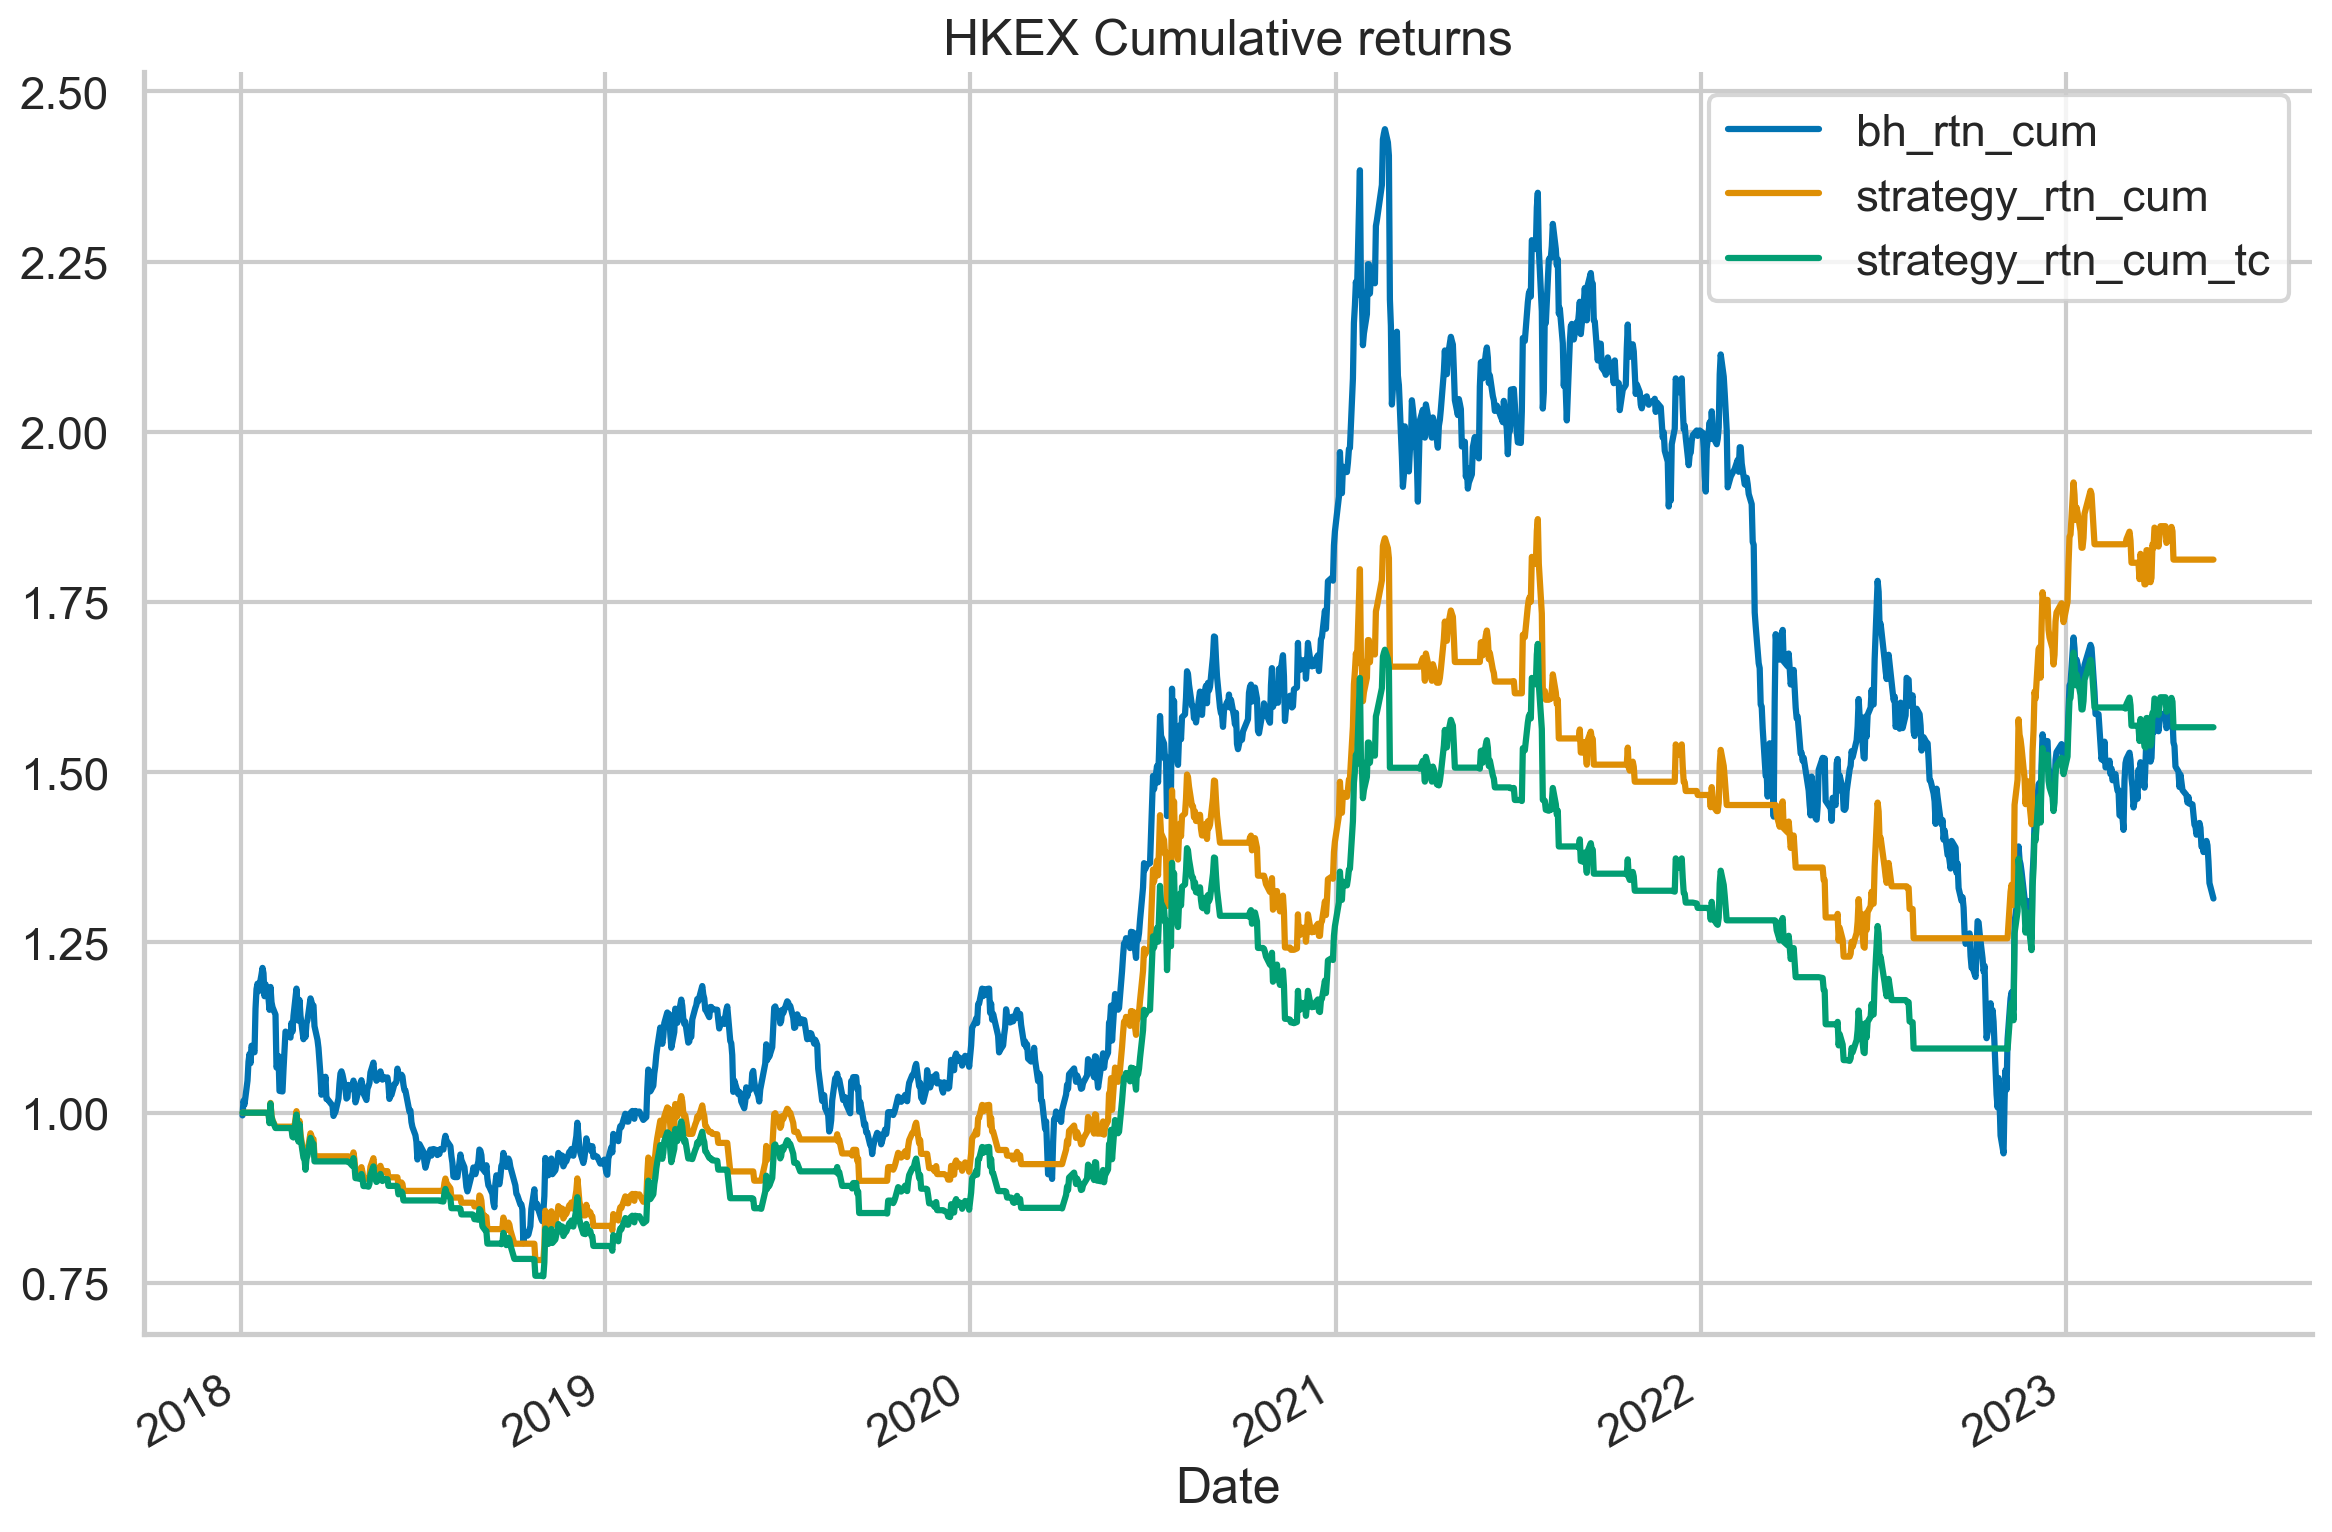

In [12]:
(
    df
    .loc[:, ["bh_rtn_cum", "strategy_rtn_cum", "strategy_rtn_cum_tc"]]
    .plot(title="HKEX Cumulative returns")
)

sns.despine()
plt.tight_layout()

In [5]:
from datetime import datetime
import backtrader as bt
import backtrader.feeds as btfeeds
from strategy_utils import *

In [5]:
df = yf.download("0388.HK", 
                 start="2018-01-01",
                 end="2023-05-30",
                 progress=False)

In [15]:
df.to_csv("0388.csv", index=True)

In [8]:
data = btfeeds.YahooFinanceCSVData(dataname='0388.csv')

In [17]:
class SmaStrategy(bt.Strategy):
    # specifies the lookback period for the SMA
    params = (("ma_period", 20), )

    def __init__(self):
        # keep track of close price in the series
        self.data_close = self.datas[0].close

        # keep track of pending orders
        self.order = None

        # add a simple moving average indicator
        self.sma = bt.ind.SMA(self.datas[0],
                              period=self.params.ma_period)
        
    # print log messages to console during the backtesting or trading process
    #The ISO format for dates is YYYY-MM-DD
    
    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f"{dt}: {txt}")

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted
            # no action required
            return

        # report executed order
        if order.status in [order.Completed]:

            direction = "b" if order.isbuy() else "s"
            log_str = get_action_log_string(
                dir=direction, 
                action="e", 
                price=order.executed.price,
                size=order.executed.size,
                cost=order.executed.value, 
                commission=order.executed.comm
            )
            self.log(log_str)

        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log("Order Failed")

        # reset order -> no pending order
        self.order = None
    
    # reports the results of trades (after the positions are closed)
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log(
            get_result_log_string(gross=trade.pnl, net=trade.pnlcomm)
        )

    def next(self):
        # do nothing if an order is pending
        if self.order:
            return

        # check if there is already a position
        if not self.position:
            # buy condition
            if self.data_close[0] > self.sma[0]:
                self.log(
                    get_action_log_string("b", "c", self.data_close[0], 1)
                )
                self.order = self.buy()
        else:
            # sell condition
            if self.data_close[0] < self.sma[0]:      
                self.log(
                    get_action_log_string("s", "c", self.data_close[0], 1)
                )      
                self.order = self.sell()

    def start(self):
        print(f"Initial Portfolio Value: {self.broker.get_value():.2f}")

    def stop(self):
        print(f"Final Portfolio Value: {self.broker.get_value():.2f}")

In [7]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcommission(commission=0.001)  # 0.1% of the operation value
cerebro.broker.setcash(1000.0)
cerebro.addstrategy(SmaStrategy)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)

In [8]:
cerebro.run()

Initial Portfolio Value: 1000.00
2018-01-29: BUY CREATED - Price: 256.76, Size: 1.00
2018-01-30: BUY EXECUTED - Price: 255.88, Size: 1.00, Cost: 255.88, Commission: 0.26
2018-02-05: SELL CREATED - Price: 251.48, Size: 1.00
2018-02-06: SELL EXECUTED - Price: 242.70, Size: -1.00, Cost: 255.88, Commission: 0.24
2018-02-06: OPERATION RESULT - Gross: -13.18, Net: -13.68
2018-02-21: BUY CREATED - Price: 248.85, Size: 1.00
2018-02-22: BUY EXECUTED - Price: 246.21, Size: 1.00, Cost: 246.21, Commission: 0.25
2018-02-22: SELL CREATED - Price: 246.04, Size: 1.00
2018-02-23: SELL EXECUTED - Price: 248.67, Size: -1.00, Cost: 246.21, Commission: 0.25
2018-02-23: OPERATION RESULT - Gross: 2.46, Net: 1.97
2018-02-23: BUY CREATED - Price: 251.13, Size: 1.00
2018-02-26: BUY EXECUTED - Price: 254.82, Size: 1.00, Cost: 254.82, Commission: 0.25
2018-03-05: SELL CREATED - Price: 243.58, Size: 1.00
2018-03-06: SELL EXECUTED - Price: 248.15, Size: -1.00, Cost: 254.82, Commission: 0.25
2018-03-06: OPERATION RE

2022-01-28: SELL EXECUTED - Price: 434.89, Size: -1.00, Cost: 442.43, Commission: 0.43
2022-01-28: OPERATION RESULT - Gross: -7.54, Net: -8.42
2022-03-17: BUY CREATED - Price: 374.35, Size: 1.00
2022-03-18: BUY EXECUTED - Price: 373.37, Size: 1.00, Cost: 373.37, Commission: 0.37
2022-04-06: SELL CREATED - Price: 350.67, Size: 1.00
2022-04-07: SELL EXECUTED - Price: 346.56, Size: -1.00, Cost: 373.37, Commission: 0.35
2022-04-07: OPERATION RESULT - Gross: -26.81, Net: -27.53
2022-05-03: BUY CREATED - Price: 334.43, Size: 1.00
2022-05-04: BUY EXECUTED - Price: 334.63, Size: 1.00, Cost: 334.63, Commission: 0.33
2022-05-04: SELL CREATED - Price: 329.93, Size: 1.00
2022-05-05: SELL EXECUTED - Price: 335.21, Size: -1.00, Cost: 334.63, Commission: 0.34
2022-05-05: OPERATION RESULT - Gross: 0.58, Net: -0.09
2022-05-05: BUY CREATED - Price: 334.24, Size: 1.00
2022-05-06: BUY EXECUTED - Price: 327.78, Size: 1.00, Cost: 327.78, Commission: 0.33
2022-05-06: SELL CREATED - Price: 320.54, Size: 1.00


<IPython.core.display.Javascript object>


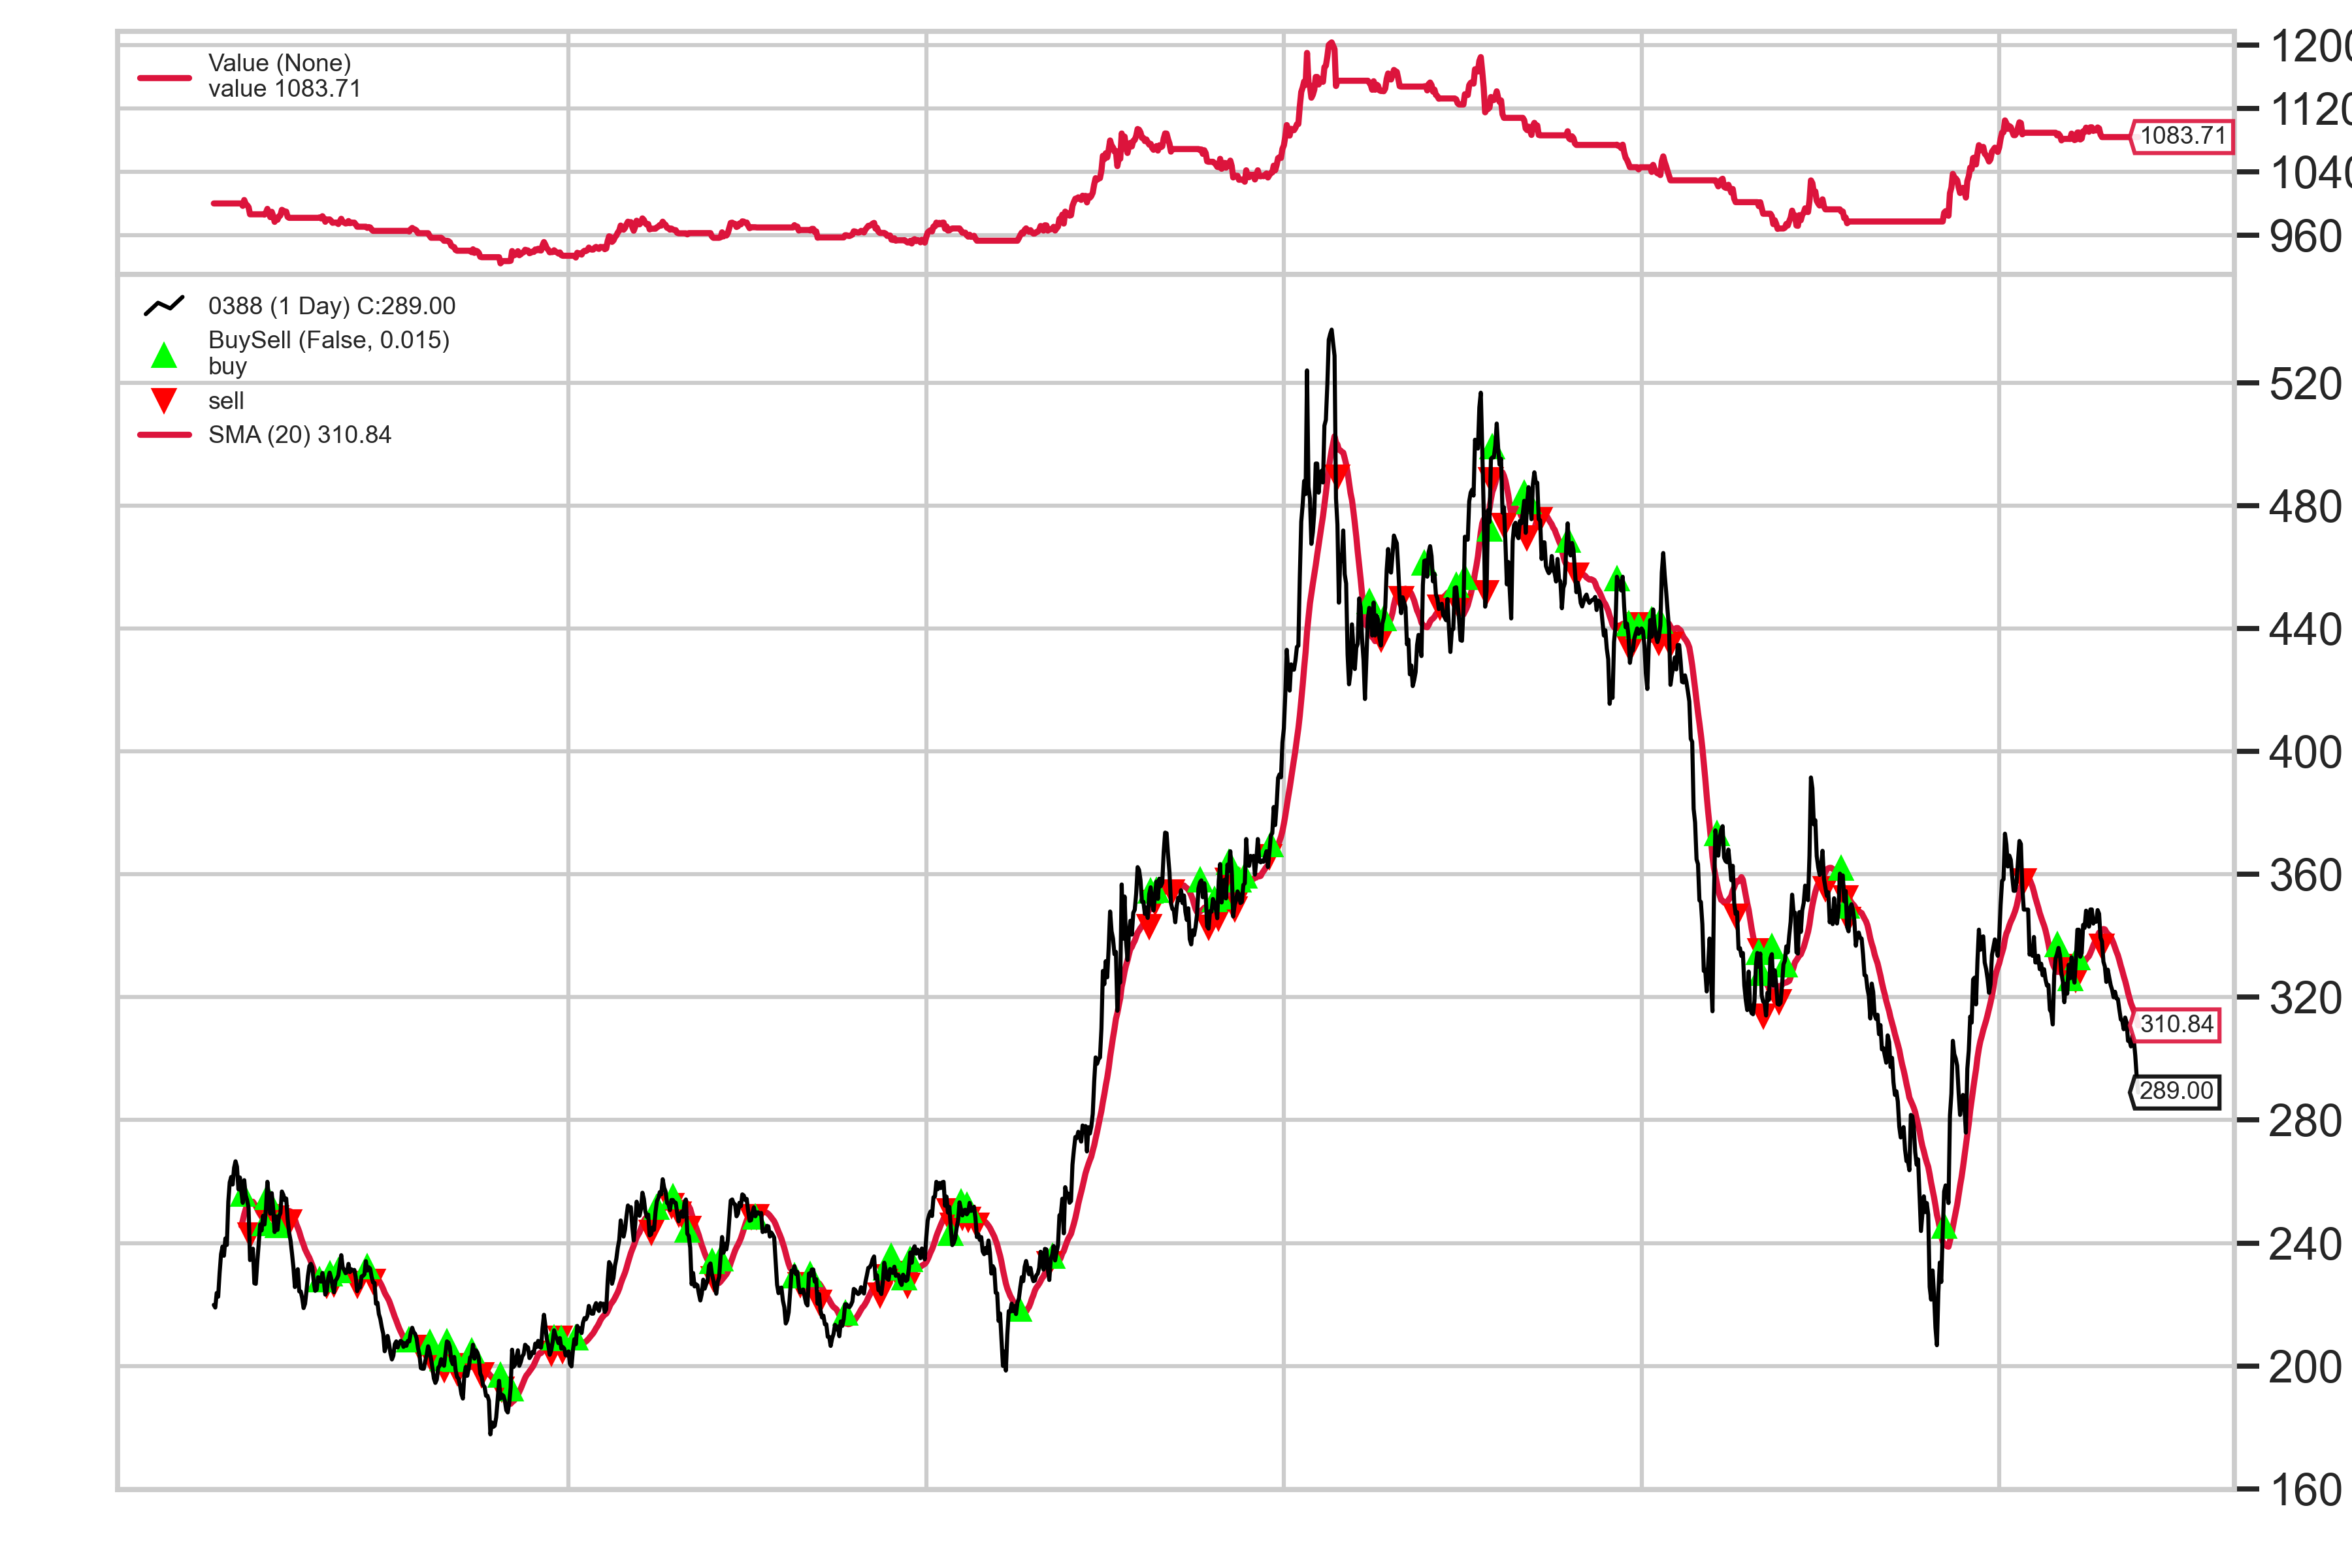

[[<Figure size 1200x800 with 2 Axes>]]

In [9]:
cerebro.plot(iplot=True, volume=False)

In [18]:
cerebro.optstrategy(SmaStrategy, ma_period=range(10, 31))

In [ ]:
# cerebro.run(maxcpus=8)

RSI

In [10]:
class RsiSignalStrategy(bt.SignalStrategy):
    params = dict(rsi_periods=14, rsi_upper=70, 
                  rsi_lower=30, rsi_mid=50)

    def __init__(self):
        
        # add RSI indicator
        rsi = bt.indicators.RSI(period=self.p.rsi_periods,
                                upperband=self.p.rsi_upper,
                                lowerband=self.p.rsi_lower)

#         # add RSI from TA-lib just for reference 
#         bt.talib.RSI(self.data, plotname="TA_RSI")
    
        # long condition (with exit)
        rsi_signal_long = bt.ind.CrossUp(rsi, self.p.rsi_lower, plot=False)
        self.signal_add(bt.SIGNAL_LONG, rsi_signal_long)
        self.signal_add(bt.SIGNAL_LONGEXIT, -(rsi > self.p.rsi_mid))

        # short condition (with exit)
        rsi_signal_short = -bt.ind.CrossDown(rsi, self.p.rsi_upper, plot=False)
        self.signal_add(bt.SIGNAL_SHORT, rsi_signal_short)
        self.signal_add(bt.SIGNAL_SHORTEXIT, rsi < self.p.rsi_mid)

In [11]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.addstrategy(RsiSignalStrategy)
cerebro.adddata(data)
cerebro.addsizer(bt.sizers.SizerFix, stake=1)
cerebro.broker.setcash(1000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(MyBuySell)
cerebro.addobserver(bt.observers.Value)

print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")
cerebro.run()
print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

Starting Portfolio Value: 1000.00
Final Portfolio Value: 996.80


In [12]:
# pip install TA-Lib

<IPython.core.display.Javascript object>


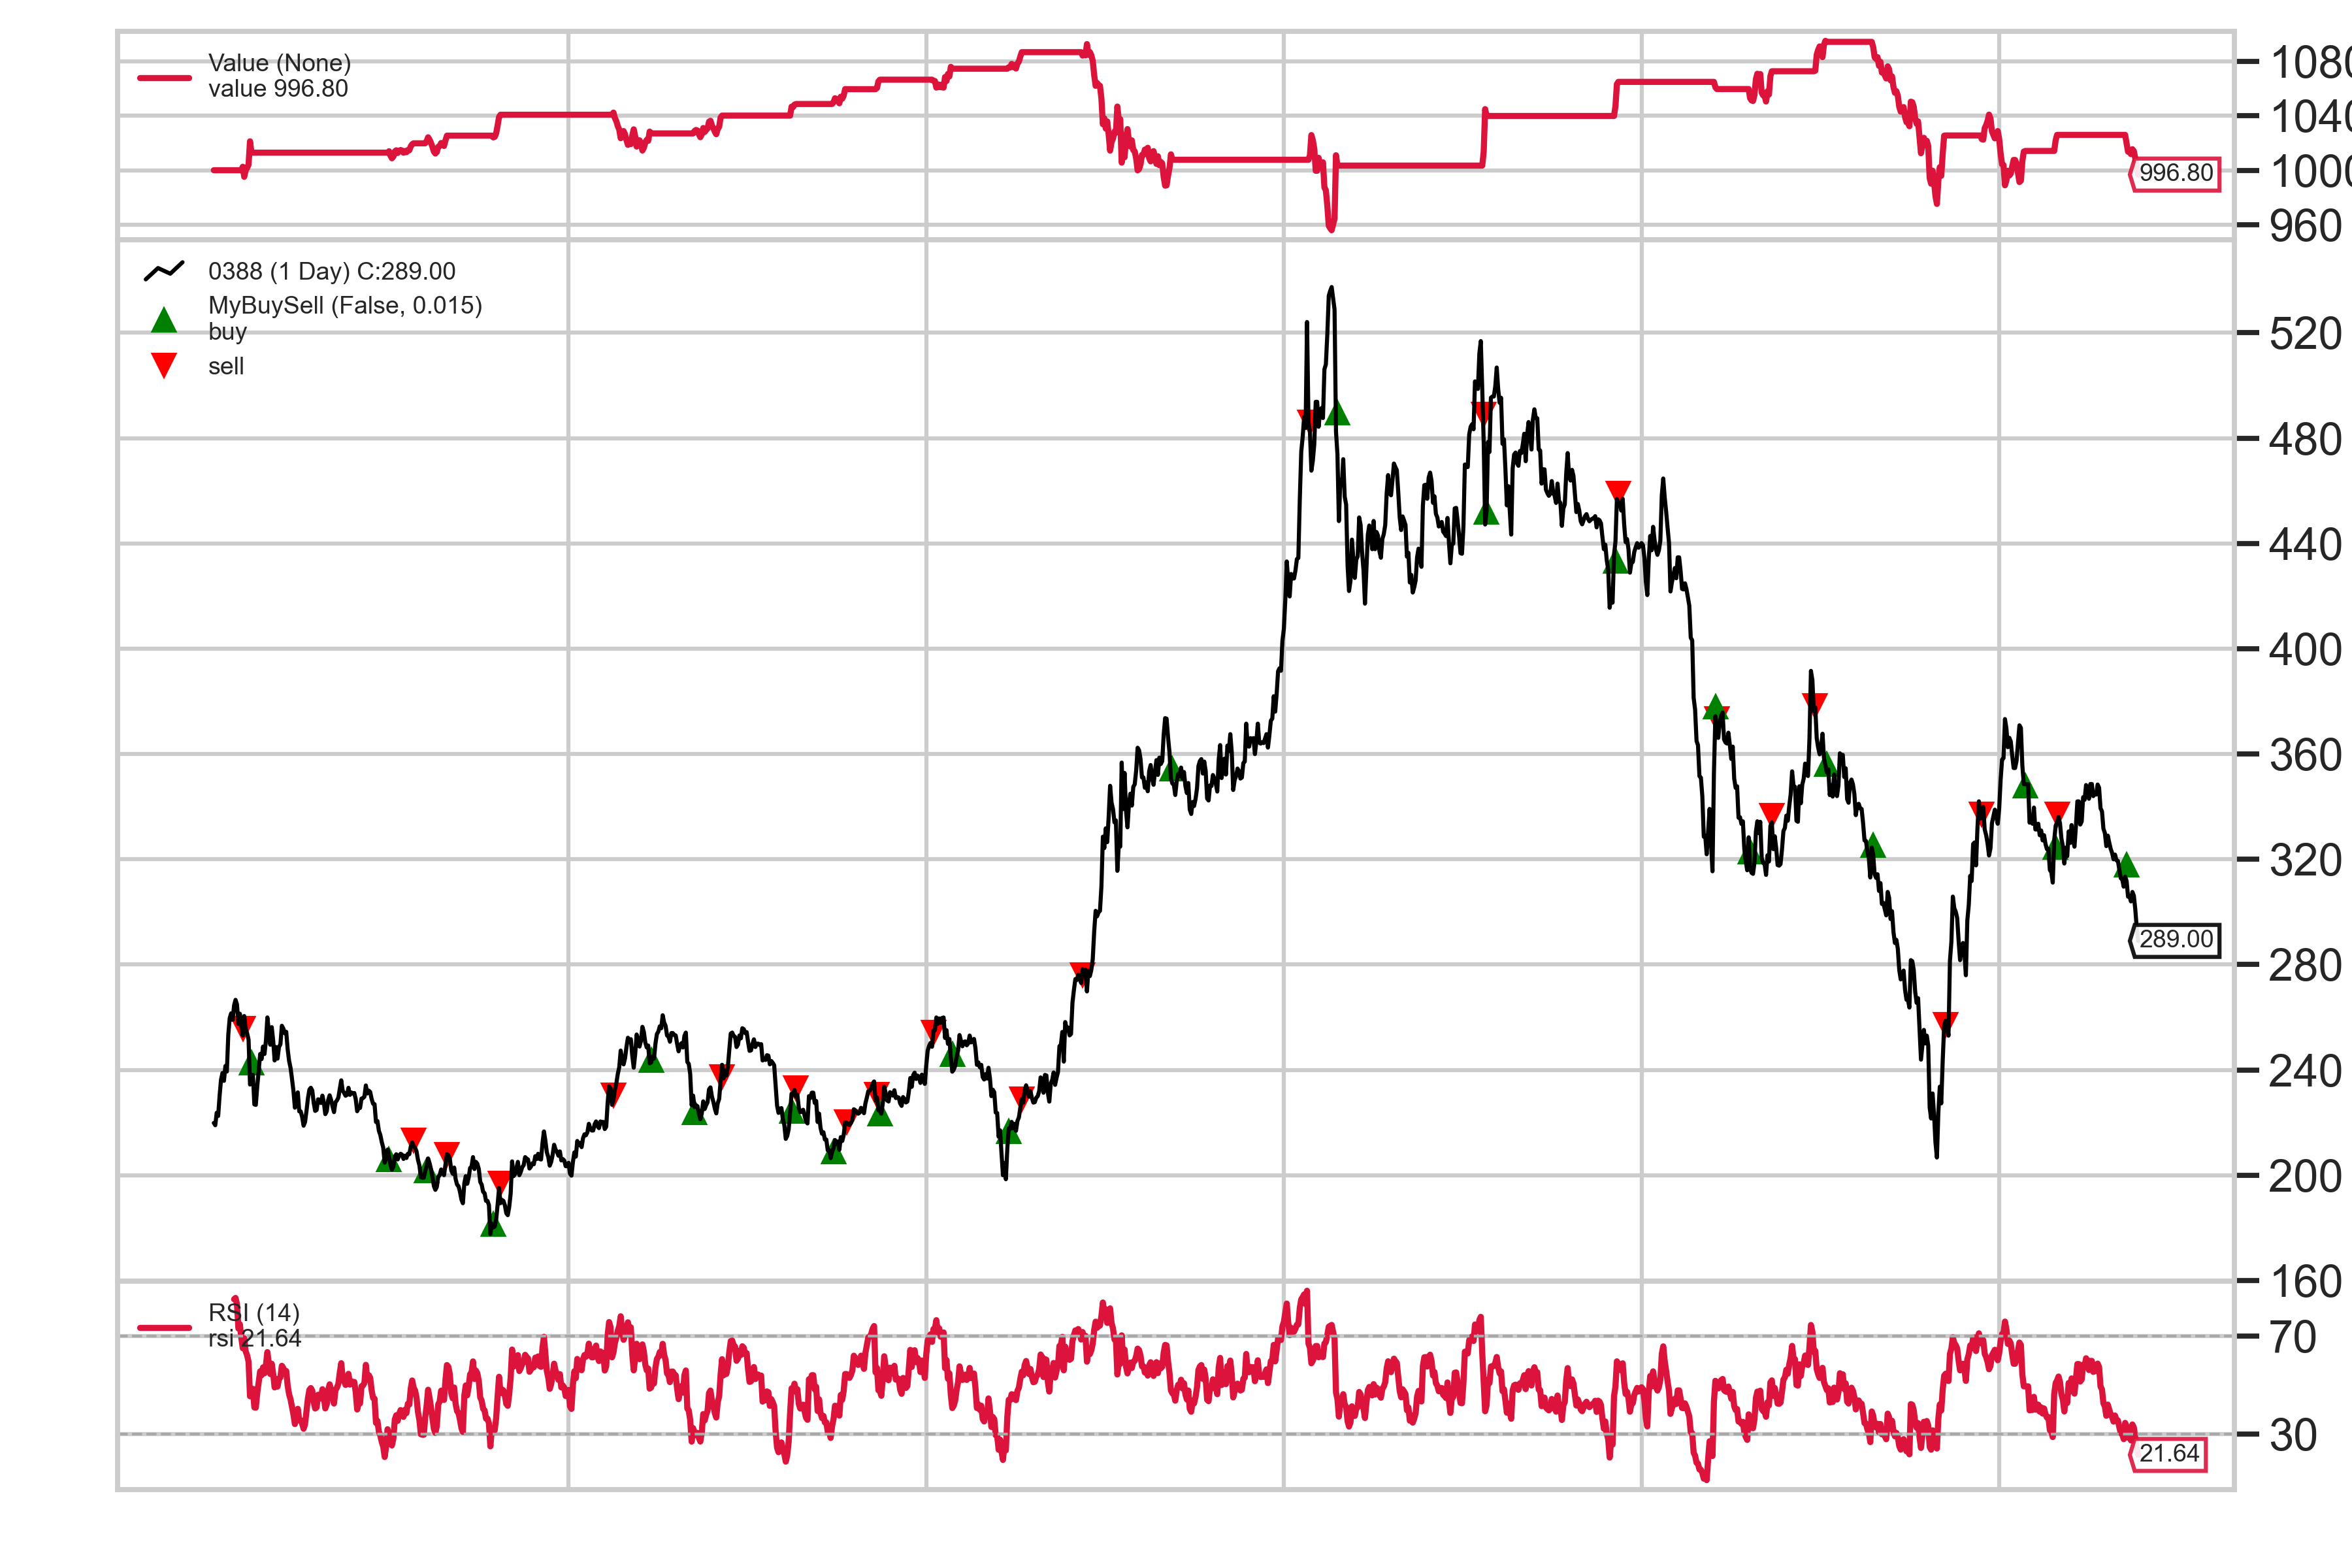

[[<Figure size 1200x800 with 3 Axes>]]

In [16]:
cerebro.plot(iplot=True, volume=False)

In [6]:
class BollingerBandStrategy(bt.Strategy):
    params = (("period", 20),
              ("devfactor", 2.0),)

    def __init__(self):
        # keep track of prices
        self.data_close = self.datas[0].close
        self.data_open = self.datas[0].open

        # keep track of pending orders
        self.order = None

        # add Bollinger Bands indicator and track the buy/sell signals
        self.b_band = bt.ind.BollingerBands(self.datas[0], 
                                            period=self.p.period, 
                                            devfactor=self.p.devfactor)
        self.buy_signal = bt.ind.CrossOver(self.datas[0], 
                                           self.b_band.lines.bot,
                                           plotname="buy_signal")
        self.sell_signal = bt.ind.CrossOver(self.datas[0], 
                                            self.b_band.lines.top,
                                            plotname="sell_signal")

    def log(self, txt):
        dt = self.datas[0].datetime.date(0).isoformat()
        print(f"{dt}: {txt}")

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # order already submitted/accepted - no action required
            return
        
        # report executed order
        if order.status in [order.Completed]:

            direction = "b" if order.isbuy() else "s"
            log_str = get_action_log_string(
                    dir=direction, 
                    action="e", 
                    price=order.executed.price,
                    size=order.executed.size,
                    cost=order.executed.value, 
                    commission=order.executed.comm
                )
            self.log(log_str)

        # report failed order
        elif order.status in [order.Canceled, order.Margin, 
                              order.Rejected]:
            self.log("Order Failed")

        # reset order -> no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log(get_result_log_string(gross=trade.pnl, net=trade.pnlcomm))

    def next_open(self):
        if not self.position:
            if self.buy_signal > 0:
                # calculate the max number of shares ("all-in")
                size = int(self.broker.getcash() / self.datas[0].open)
                # buy order
                log_str = get_action_log_string("b", "c", 
                                                price=self.data_close[0],
                                                size=size,
                                                cash=self.broker.getcash(),
                                                open=self.data_open[0],
                                                close=self.data_close[0])
                self.log(log_str)
                self.order = self.buy(size=size)
        else:
            if self.sell_signal < 0:
                # sell order
                log_str = get_action_log_string("s", "c", self.data_close[0], 
                                                self.position.size)
                self.log(log_str)
                self.order = self.sell(size=self.position.size)

    def start(self):
        print(f"Initial Portfolio Value: {self.broker.get_value():.2f}")

    def stop(self):
        print(f"Final Portfolio Value: {self.broker.get_value():.2f}")        

In [9]:
cerebro = bt.Cerebro(stdstats = False, cheat_on_open=True)

cerebro.addstrategy(BollingerBandStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(MyBuySell)
cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.Returns, _name="returns")
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name="time_return")

In [12]:
backtest_result = cerebro.run()

Initial Portfolio Value: 1000.00
2018-02-14: BUY CREATED - Price: 239.71, Size: 4.00, Cash: 1000.00, Open: 234.79, Close: 239.71
2018-02-14: BUY EXECUTED - Price: 234.79, Size: 4.00, Cost: 939.16, Commission: 0.94
2018-05-16: SELL CREATED - Price: 231.23, Size: 4.00
2018-05-16: SELL EXECUTED - Price: 231.05, Size: -4.00, Cost: 939.16, Commission: 0.92
2018-05-16: OPERATION RESULT - Gross: -14.96, Net: -16.82
2018-06-29: BUY CREATED - Price: 209.73, Size: 4.00, Cash: 983.18, Open: 206.17, Close: 209.73
2018-06-29: BUY EXECUTED - Price: 206.17, Size: 4.00, Cost: 824.68, Commission: 0.82
2018-07-27: SELL CREATED - Price: 210.44, Size: 4.00
2018-07-27: SELL EXECUTED - Price: 211.86, Size: -4.00, Cost: 824.68, Commission: 0.85
2018-07-27: OPERATION RESULT - Gross: 22.76, Net: 21.09
2018-08-08: BUY CREATED - Price: 203.51, Size: 4.00, Cash: 1004.26, Open: 201.73, Close: 203.51
2018-08-08: BUY EXECUTED - Price: 201.73, Size: 4.00, Cost: 806.92, Commission: 0.81
2018-08-30: SELL CREATED - Pric

<IPython.core.display.Javascript object>


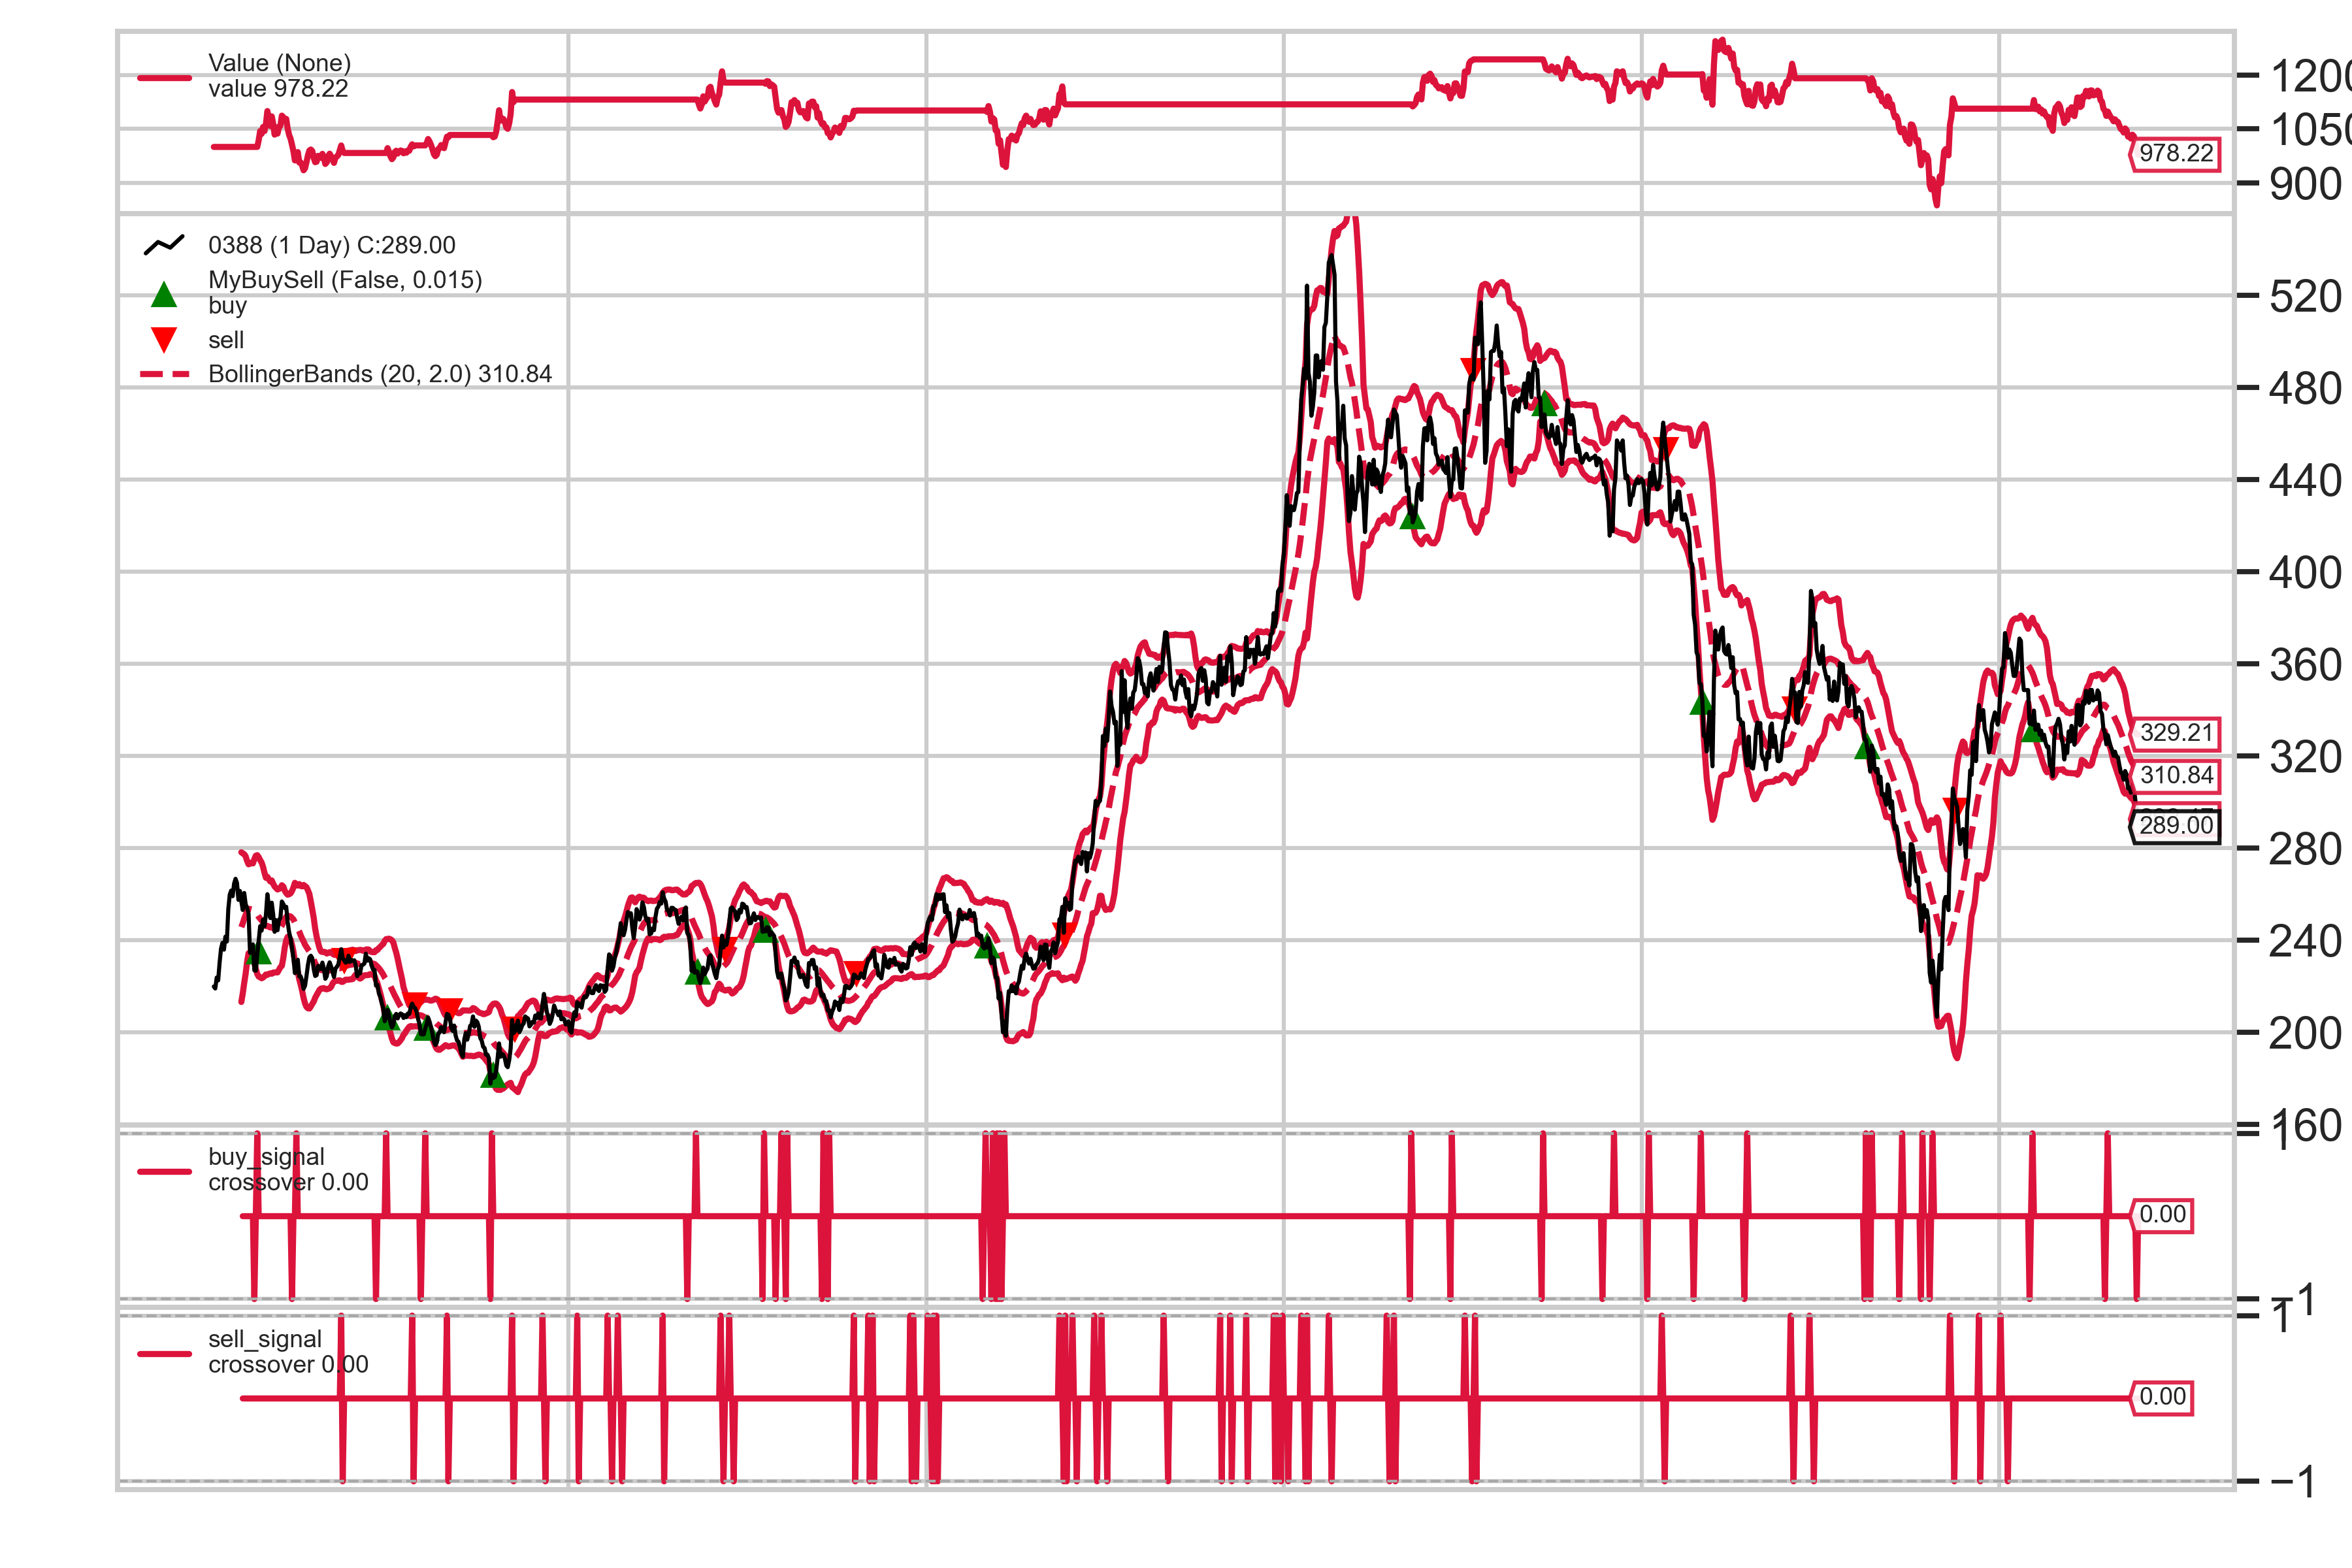

[[<Figure size 1200x800 with 4 Axes>]]

In [13]:
cerebro.plot(iplot=True, volume=False)

In [14]:
backtest_result[0].analyzers.returns.get_analysis()

OrderedDict([('rtot', -0.02201982666709638),
             ('ravg', -1.6556260651952166e-05),
             ('rnorm', -0.00416348624259173),
             ('rnorm100', -0.41634862425917296)])

<IPython.core.display.Javascript object>


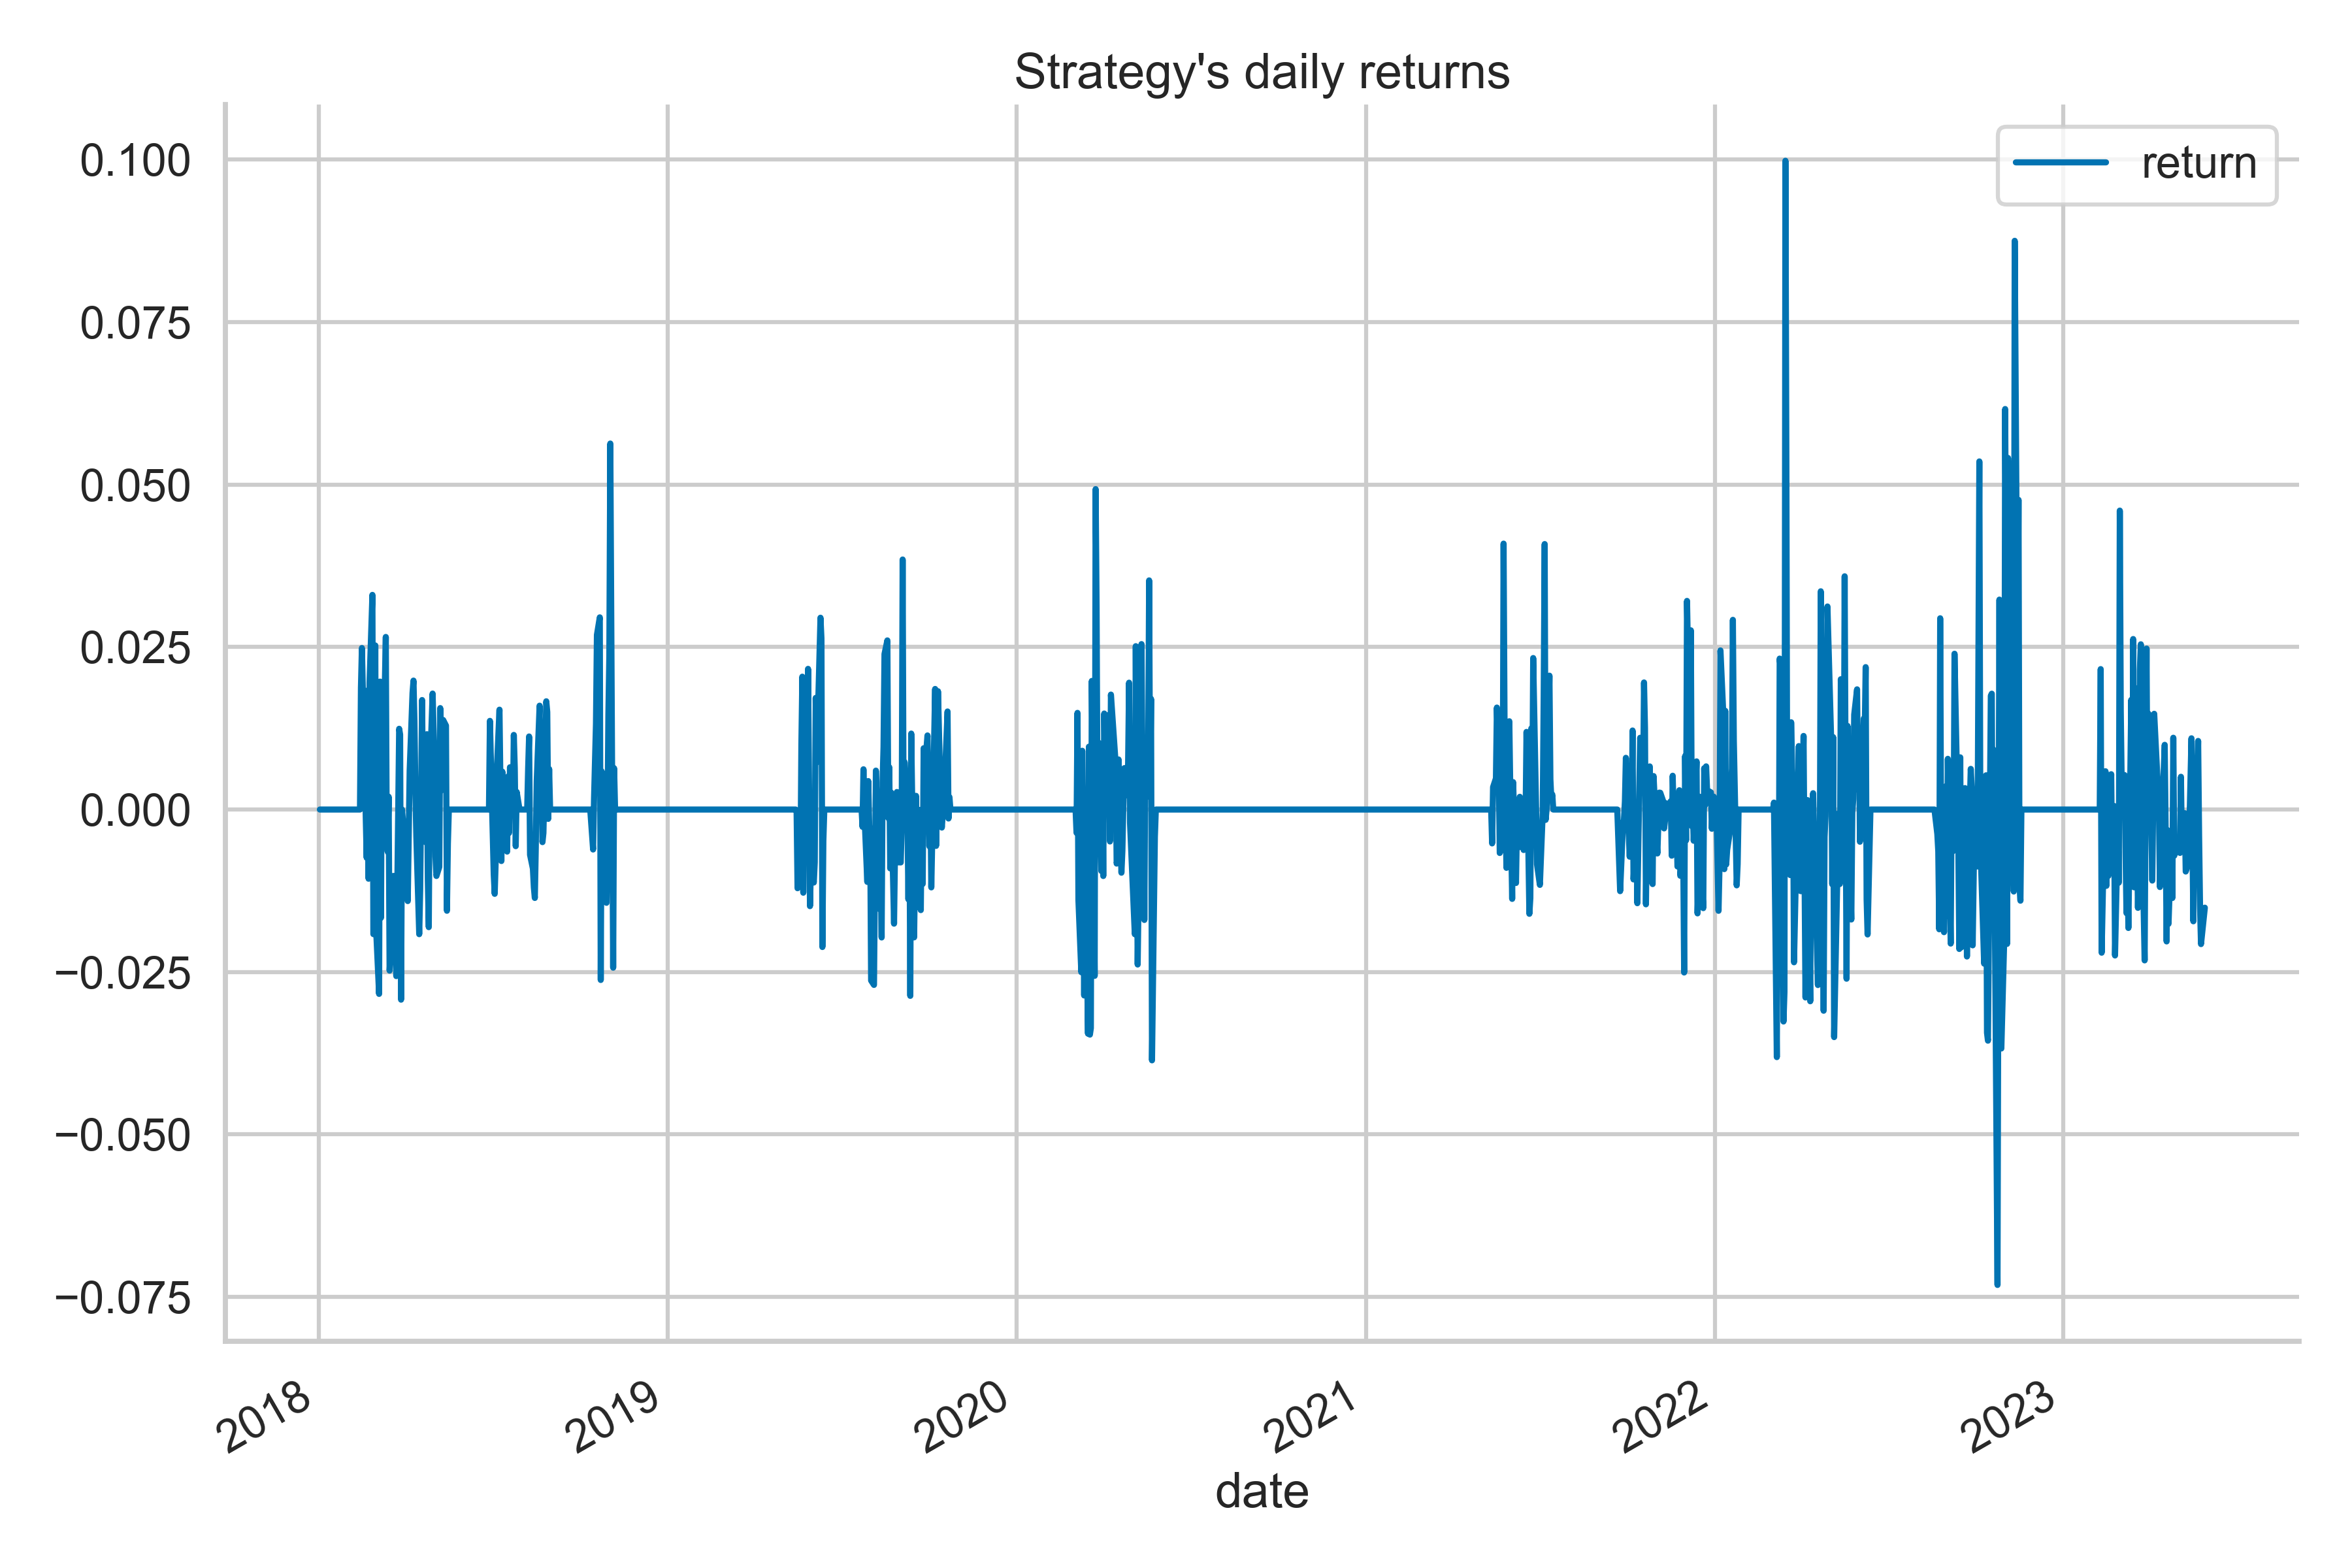

In [15]:
returns_dict = backtest_result[0].analyzers.time_return.get_analysis()
returns_df = (
    pd.DataFrame(list(returns_dict.items()), 
                 columns = ["date", "return"])
    .set_index("date")
)
returns_df.plot(title="Strategy's daily returns")

sns.despine()
plt.tight_layout()

In [25]:
import pytz

In [37]:
returns_df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
               '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-29'],
              dtype='datetime64[ns]', name='date', length=1330, freq=None)

In [29]:
returns_df.index.tz_localize(pytz.timezone('Asia/Hong_Kong'))

DatetimeIndex(['2018-01-02 00:00:00+08:00', '2018-01-03 00:00:00+08:00',
               '2018-01-04 00:00:00+08:00', '2018-01-05 00:00:00+08:00',
               '2018-01-08 00:00:00+08:00', '2018-01-09 00:00:00+08:00',
               '2018-01-10 00:00:00+08:00', '2018-01-11 00:00:00+08:00',
               '2018-01-12 00:00:00+08:00', '2018-01-15 00:00:00+08:00',
               ...
               '2023-05-15 00:00:00+08:00', '2023-05-16 00:00:00+08:00',
               '2023-05-17 00:00:00+08:00', '2023-05-18 00:00:00+08:00',
               '2023-05-19 00:00:00+08:00', '2023-05-22 00:00:00+08:00',
               '2023-05-23 00:00:00+08:00', '2023-05-24 00:00:00+08:00',
               '2023-05-25 00:00:00+08:00', '2023-05-29 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Hong_Kong]', name='date', length=1330, freq=None)

In [40]:
returns_df

return
date                
2018-01-02  0.000000
2018-01-03  0.000000
2018-01-04  0.000000
2018-01-05  0.000000
2018-01-08  0.000000
...              ...
2023-05-22  0.010555
2023-05-23 -0.004062
2023-05-24 -0.015148
2023-05-25 -0.020706
2023-05-29 -0.015102

[1330 rows x 1 columns]

In [34]:
import pandas as pd
import pytz

# Create a datetime object without time zone information
dt_naive = pd.Timestamp('2023-06-24 12:00:00')

# Localize the datetime object to the 'US/Pacific' time zone
dt_localized = dt_naive.tz_localize(pytz.timezone('US/Pacific'))

In [35]:
print(dt_naive)

2023-06-24 12:00:00


In [36]:
print(dt_localized)

2023-06-24 12:00:00-07:00


In [68]:
# Create a DataFrame with a DatetimeIndex set to 'Asia/Hong_Kong'
data = {'value': [1, 2, 3, 4, 5]}
date_rng = pd.date_range(start='2023-06-01', end='2023-06-05', freq='D', tz='Asia/Hong_Kong')
df = pd.DataFrame(data=data, index=date_rng)
df.index.name='datetime_col'
print(df)

                           value
datetime_col                    
2023-06-01 00:00:00+08:00      1
2023-06-02 00:00:00+08:00      2
2023-06-03 00:00:00+08:00      3
2023-06-04 00:00:00+08:00      4
2023-06-05 00:00:00+08:00      5


In [69]:
# Change the time zone of the DatetimeIndex to 'UTC'
df.index = df.index.tz_convert('UTC')
df

value
datetime_col                    
2023-05-31 16:00:00+00:00      1
2023-06-01 16:00:00+00:00      2
2023-06-02 16:00:00+00:00      3
2023-06-03 16:00:00+00:00      4
2023-06-04 16:00:00+00:00      5

In [19]:
import quantstats as qs
from quantstats.reports.metrics import benchmark

ModuleNotFoundError: No module named 'quantstats.reports.metrics'; 'quantstats.reports' is not a package

In [56]:
import quantstats as qs
qs.reports.metrics(returns_df,
                   benchmark="^HSI",
                   mode="basic")

TypeError: Cannot compare dtypes datetime64[ns, Asia/Hong_Kong] and datetime64[ns]

In [14]:
returns_df.head()

return
date              
2018-01-02     0.0
2018-01-03     0.0
2018-01-04     0.0
2018-01-05     0.0
2018-01-08     0.0

In [19]:
# Download data for trading strategy and Hang Seng Index
tickers = ['^HSI']
dt = yf.download(tickers, start='2018-01-01', end="2023-05-30")

[*********************100%***********************]  1 of 1 completed


In [20]:
dt.head()

Open          High           Low         Close  \
Date                                                                 
2018-01-02  30028.289062  30515.310547  30028.289062  30515.310547   
2018-01-03  30658.730469  30724.320312  30456.759766  30560.949219   
2018-01-04  30691.710938  30796.929688  30560.429688  30736.480469   
2018-01-05  30893.859375  30911.009766  30638.529297  30814.640625   
2018-01-08  30895.089844  30929.150391  30732.539062  30899.529297   

               Adj Close      Volume  
Date                                  
2018-01-02  30515.310547  2442333400  
2018-01-03  30560.949219  2309467700  
2018-01-04  30736.480469  2995571100  
2018-01-05  30814.640625  2263930100  
2018-01-08  30899.529297  2004162500

In [42]:
# Compute returns for trading strategy and Hang Seng Index
hsi_returns = pd.DataFrame(qs.utils.to_returns(dt['Adj Close']))

In [44]:
hsi_returns.head()

Adj Close
Date                 
2018-01-02   0.000000
2018-01-03   0.001496
2018-01-04   0.005744
2018-01-05   0.002543
2018-01-08   0.002755

In [53]:
y = hsi_returns.tz_localize('Asia/Hong_Kong').tz_convert(None)
y.head()

Adj Close
Date                          
2018-01-01 16:00:00   0.000000
2018-01-02 16:00:00   0.001496
2018-01-03 16:00:00   0.005744
2018-01-04 16:00:00   0.002543
2018-01-07 16:00:00   0.002755

In [71]:
y.index

DatetimeIndex(['2018-01-01 16:00:00', '2018-01-02 16:00:00',
               '2018-01-03 16:00:00', '2018-01-04 16:00:00',
               '2018-01-07 16:00:00', '2018-01-08 16:00:00',
               '2018-01-09 16:00:00', '2018-01-10 16:00:00',
               '2018-01-11 16:00:00', '2018-01-14 16:00:00',
               ...
               '2023-05-14 16:00:00', '2023-05-15 16:00:00',
               '2023-05-16 16:00:00', '2023-05-17 16:00:00',
               '2023-05-18 16:00:00', '2023-05-21 16:00:00',
               '2023-05-22 16:00:00', '2023-05-23 16:00:00',
               '2023-05-24 16:00:00', '2023-05-28 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=1330, freq=None)

In [73]:
bench = qs.utils.download_returns("^HSI")

In [74]:
bench

Date
1986-12-31 00:00:00+08:00         NaN
1987-01-02 00:00:00+08:00   -0.010980
1987-01-05 00:00:00+08:00    0.004842
1987-01-06 00:00:00+08:00    0.012341
1987-01-07 00:00:00+08:00    0.008979
                               ...   
2023-06-16 00:00:00+08:00    0.010664
2023-06-19 00:00:00+08:00   -0.006361
2023-06-20 00:00:00+08:00   -0.015357
2023-06-21 00:00:00+08:00   -0.019826
2023-06-23 00:00:00+08:00   -0.017087
Name: Close, Length: 9006, dtype: float64

In [76]:
bench.index = bench.index.tz_convert(None)
bench.index

TypeError: Cannot convert tz-naive timestamps, use tz_localize to localize